<a href="https://colab.research.google.com/github/philsaurabh/Tutorials/blob/main/Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [74]:
# To read data as dataframe
df = pd.read_csv('https://raw.githubusercontent.com/philsaurabh/Tutorials/main/Credit.csv')
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Defaultee
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0


In [75]:
df.corr()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance,Defaultee
Unnamed: 0,1.000000,0.037203,0.024172,0.021985,-0.036304,0.058603,-0.001415,0.006064,-0.009411
Income,0.037203,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656,0.406121
Limit,0.024172,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697,0.622837
Rating,0.021985,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625,0.628375
Cards,-0.036304,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456,0.100063
Age,0.058603,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835,0.038126
Education,-0.001415,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062,0.009590
Balance,0.006064,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000,0.744432
Defaultee,-0.009411,0.406121,0.622837,0.628375,0.100063,0.038126,0.009590,0.744432,1.000000


In [76]:
df_drop=df.drop(labels=['Defaultee','Gender','Student','Ethnicity','Married'],axis=1)
df_drop.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
0,1,14.891,3606,283,2,34,11,333
1,2,106.025,6645,483,3,82,15,903
2,3,104.593,7075,514,4,71,11,580
3,4,148.924,9504,681,3,36,11,964
4,5,55.882,4897,357,2,68,16,331


In [77]:
cols = df_drop.columns.tolist()
cols

['Unnamed: 0',
 'Income',
 'Limit',
 'Rating',
 'Cards',
 'Age',
 'Education',
 'Balance']

In [78]:
# separating features of our dataframe from the labels
X = df_drop.iloc[:,1:8].values
y = df_drop.iloc[:,0].values
X

array([[1.48910e+01, 3.60600e+03, 2.83000e+02, ..., 3.40000e+01,
        1.10000e+01, 3.33000e+02],
       [1.06025e+02, 6.64500e+03, 4.83000e+02, ..., 8.20000e+01,
        1.50000e+01, 9.03000e+02],
       [1.04593e+02, 7.07500e+03, 5.14000e+02, ..., 7.10000e+01,
        1.10000e+01, 5.80000e+02],
       ...,
       [5.78720e+01, 4.17100e+03, 3.21000e+02, ..., 6.70000e+01,
        1.20000e+01, 1.38000e+02],
       [3.77280e+01, 2.52500e+03, 1.92000e+02, ..., 4.40000e+01,
        1.30000e+01, 0.00000e+00],
       [1.87010e+01, 5.52400e+03, 4.15000e+02, ..., 6.40000e+01,
        7.00000e+00, 9.66000e+02]])

# Data Standardisation

In [79]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [80]:
# Covarience Matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00250627  0.79407353  0.79336103 -0.01831841  0.17577785 -0.02776139
   0.4648185 ]
 [ 0.79407353  1.00250627  0.99937818  0.01025698  0.10114077 -0.02360755
   0.86385691]
 [ 0.79336103  0.99937818  1.00250627  0.05337246  0.10342355 -0.03021115
   0.86578963]
 [-0.01831841  0.01025698  0.05337246  1.00250627  0.04305593 -0.05121225
   0.08667303]
 [ 0.17577785  0.10114077  0.10342355  0.04305593  1.00250627  0.00362836
   0.00183972]
 [-0.02776139 -0.02360755 -0.03021115 -0.05121225  0.00362836  1.00250627
  -0.00808178]
 [ 0.4648185   0.86385691  0.86578963  0.08667303  0.00183972 -0.00808178
   1.00250627]]


In [81]:
# Eigen decomposition of the covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 4.45399793e-01  7.38478885e-01 -4.63728428e-01 -2.61335303e-03
   1.33726519e-01 -1.49278828e-01  3.24056468e-02]
 [ 5.36014689e-01 -3.39526203e-02  4.59356441e-01 -7.04822682e-01
   8.99472325e-03  3.54273272e-02  4.91540298e-02]
 [ 5.36641042e-01 -2.52634696e-02  4.55060254e-01  7.08720002e-01
  -1.54517933e-02  3.94973956e-02  1.46789537e-02]
 [ 2.91606875e-02  1.58644967e-01  1.67009318e-02 -3.03886879e-02
  -6.51448387e-01  7.70066332e-02 -7.36521563e-01]
 [ 7.81878134e-02 -2.55245791e-01 -1.22244643e-02 -2.53960639e-04
   1.81007390e-01 -8.95683817e-01 -3.05897982e-01]
 [-1.90162104e-02  4.55454277e-02  8.11048127e-03  3.13624060e-03
  -7.10981382e-01 -3.63340314e-01  5.99981394e-01]
 [ 4.67972621e-01 -6.00387281e-01 -6.05288058e-01 -8.61783648e-04
  -1.38399254e-01  1.86292746e-01  1.74075620e-02]]

Eigenvalues 
[3.43323241e+00 4.94553856e-01 4.98778290e-02 2.18625324e-03
 9.57948914e-01 1.02062852e+00 1.05911608e+00]


In [82]:
# Selecting Principal Components
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.4332324069111957
1.0591160779975888
1.0206285227060878
0.9579489136845248
0.49455385607799585
0.04987782902968256
0.002186253242046895


In [83]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

In [84]:
# Projection Matrix
matrix_w = np.hstack((eig_pairs[0][1].reshape(7,1), 
                      eig_pairs[1][1].reshape(7,1)
                    ))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.44539979  0.03240565]
 [ 0.53601469  0.04915403]
 [ 0.53664104  0.01467895]
 [ 0.02916069 -0.73652156]
 [ 0.07818781 -0.30589798]
 [-0.01901621  0.59998139]
 [ 0.46797262  0.01740756]]


# Projection Onto the New Feature Space 
In this last step we will use the 7×2-dimensional projection matrix W to transform our samples onto the new subspace via the equation Y=X×W

In [85]:
Y = X_std.dot(matrix_w)
Y.shape

(400, 2)

# PCA in scikit-learn

In [87]:
# Machine learning systems work with integers, we need to encode these
# string characters into ints
encoder = LabelEncoder()
# Now apply the transformation to all the columns:
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])
X = df.iloc[:,1:11].values
y = df.iloc[:,0].values
X_std = StandardScaler().fit_transform(X)

In scikit-learn estimator api,

fit() : used for generating learning model parameters from training data

transform() : parameters generated from fit() method,applied upon model to generate transformed data set.

fit_transform() : combination of fit() and transform() api on same data set

In [88]:
pca.fit_transform(X_std)

array([[-1.40928362, -1.72617919, -0.4385511 , ...,  0.38620513,
         0.74222051, -0.08652764],
       [ 2.26089488,  2.02392369, -1.27128021, ...,  2.05263518,
        -0.25496661,  0.0362074 ],
       [ 2.30707567,  0.51590996,  1.89924765, ..., -0.16215627,
        -0.27631907,  0.01455184],
       ...,
       [ 0.35232919, -0.89333514,  0.71036027, ...,  0.33548309,
        -0.98322704,  0.00678771],
       [-1.34585241, -1.26288303, -0.8271535 , ...,  0.5509644 ,
        -0.91374509, -0.01076684],
       [ 0.4056268 ,  0.32639756,  2.24269824, ..., -0.25609418,
         1.29805809,  0.07738083]])

In [89]:
sklearn_pca = PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(X_std)
print(Y_sklearn.shape)

(400, 5)


[2.58640265 1.14355889 1.12592909 1.01893291 0.97874642 0.97461326
 0.95117198 0.82163208 0.41935814 0.00471724]


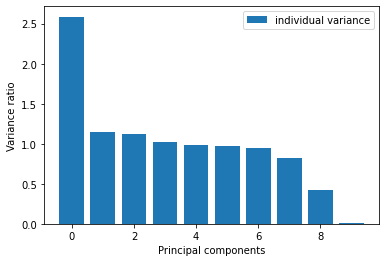

In [90]:
# Visualize
pca = PCA()
pca.fit_transform(X_std)
pca_variance = pca.explained_variance_
print(pca_variance)

plt.figure()
plt.bar(range(10), pca_variance, label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

In [91]:
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

# Additional

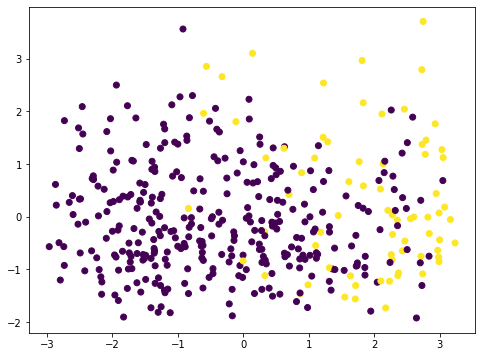

In [33]:
pca2 = PCA(n_components=2)
pca2.fit(X_std)
x_3d = pca2.transform(X_std)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,1], c=df['Defaultee'])
plt.show()

In [94]:
pca2 = PCA(n_components=6)
pca2.fit(X_std)
x_3d = pca2.transform(X_std)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, train_size = 0.8, test_size = 0.2)# random_state = 100
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train, y_train))
reg.score(X_test, y_test)

0.046679907037508794


-0.06332793175307638

In [95]:
pca2 = PCA(n_components=2)
pca2.fit(X_std)
x_3d = pca2.transform(X_std)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, train_size = 0.8, test_size = 0.2)# random_state = 100
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train, y_train))
reg.score(X_test, y_test)

0.03709226206790184


-0.12681712211402374